# EDA

### Table of Contents

* [Part I: Research Question](#Research_Question)
    * [Section 1A](#section_1_1)
    * [Section 1B](#Section_1_2)
* [Part II: Data-Cleaning Plan](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part III: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part IV: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

# Business Questions

## Realtor

As a realtor, I would like to know the following:

- What zipcodes have the highest average house prices?
    - How do we define the highest average house price?
    - Factors that contribute to it?
        - What features predict higher prices?
        - What is the average living area of these houses?
        - What year were these houses built?
    - Do number of bathrooms and bedrooms affect the housing price?
    - Does the year that a house was built affect the price and value?
    - Does renovation increase the value of the price of that home was sold?
    - Does houses on the waterfront have a higher sale price?
    - Does a view affect sale price?
    - What level of condition sells the highest?

## KPIs

As a realtor, I’d like to see the following KPIs:

- Average Price Per Zipcode
- Price per Square Foot
- Average Price Per Level of Condition

# Extract Data 

In [12]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plot 
import matplotlib
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns


Using matplotlib backend: Qt5Agg


In [10]:
import missingno as msno

In [3]:
from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We will drop the following columns: grade, sqft_above, lat, long, sqft_living15, sqft_lot15. These do not answer our business questions.

In [7]:
df2 = df.drop(['grade', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 2.5+ MB


<AxesSubplot:>

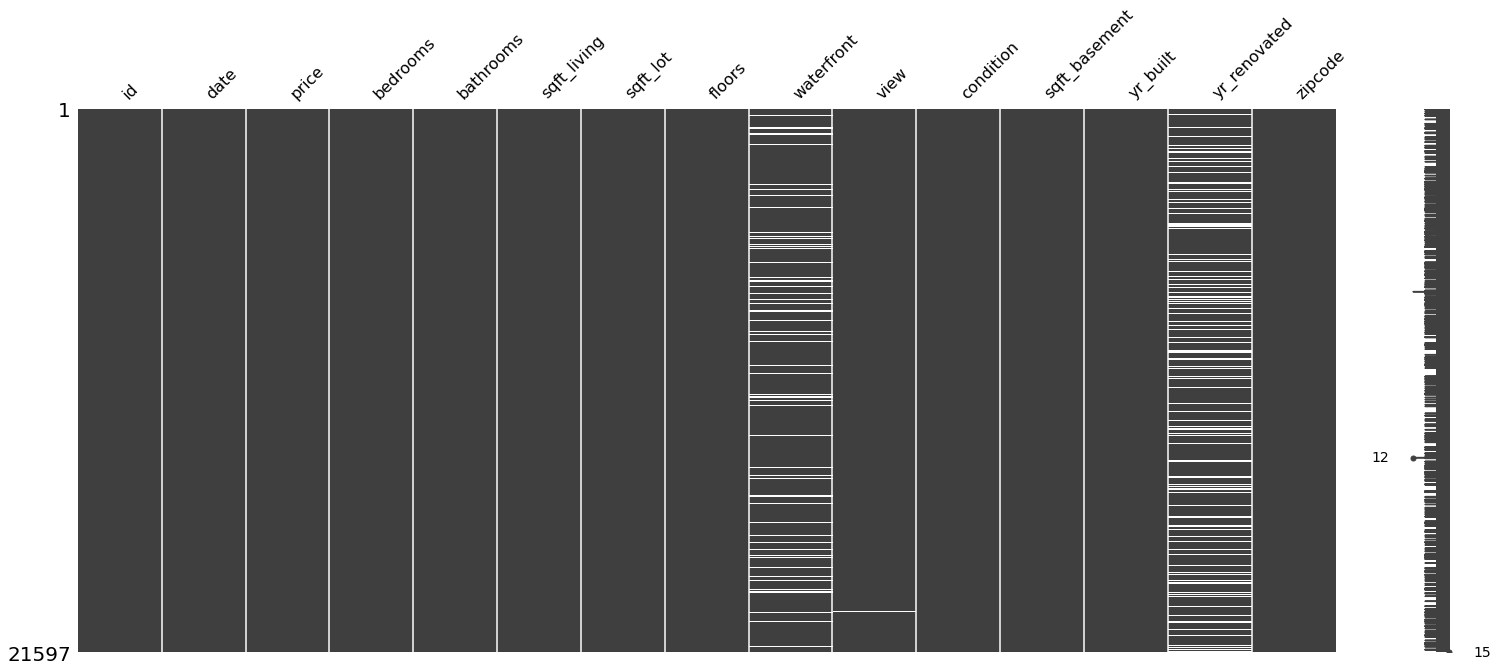

In [11]:
msno.matrix(df2)

In [20]:
df2.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
dtype: int64

In [21]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [22]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# Distribution

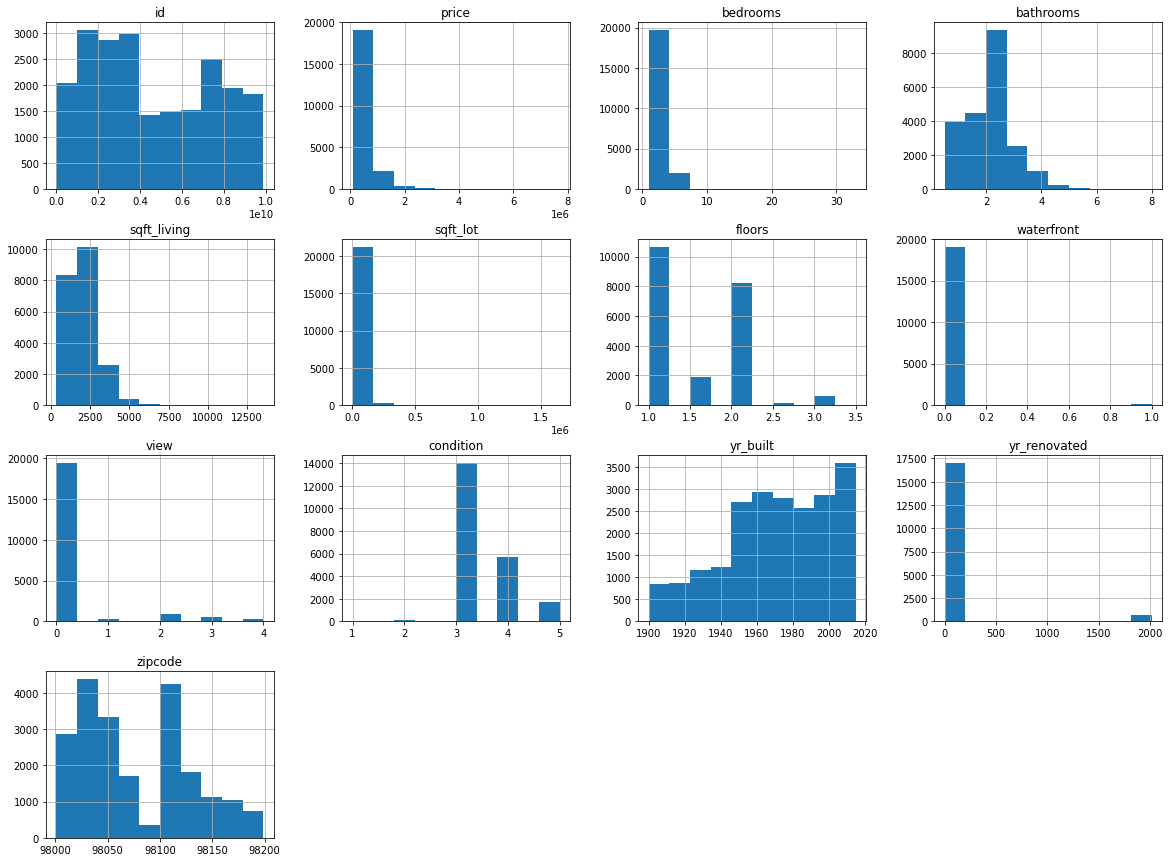

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.hist(figsize=(20, 15))
plt.show()